<a href="https://colab.research.google.com/github/Dieljr/README/blob/main/Clustering_alg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='blue'>Projeto de Clusterização para Aprendizagem Não Supervisionada</font>

# Dataset
## Individual Household Electric Power Consumption - IHEPC

### Objetivo: encontrar os melhores agrupamentos por consumo de energia

### Source:

#### Site:

https://archive.ics.uci.edu/ml/datasets/Individual+household+electric+power+consumption

Georges Hebrail (georges.hebrail '@' edf.fr), Senior Researcher, EDF R&D, Clamart, France
Alice Berard, TELECOM ParisTech Master of Engineering Internship at EDF R&D, Clamart, France

### Data Set Information:

This archive contains 2075259 measurements gathered in a house located in Sceaux (7km of Paris, France) between December 2006 and November 2010 (47 months).
Notes:
1.(global_active_power*1000/60 - sub_metering_1 - sub_metering_2 - sub_metering_3) represents the active energy consumed every minute (in watt hour) in the household by electrical equipment not measured in sub-meterings 1, 2 and 3.
2.The dataset contains some missing values in the measurements (nearly 1,25% of the rows). All calendar timestamps are present in the dataset but for some timestamps, the measurement values are missing: a missing value is represented by the absence of value between two consecutive semi-colon attribute separators. For instance, the dataset shows missing values on April 28, 2007.

### Attribute Information:

1.date: Date in format dd/mm/yyyy,

2.time: time in format hh:mm:ss

3.global_active_power: household global minute-averaged active power (in kilowatt)

4.global_reactive_power: household global minute-averaged reactive power (in kilowatt)

5.voltage: minute-averaged voltage (in volt)

6.global_intensity: household global minute-averaged current intensity (in ampere)

7.sub_metering_1: energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered).

8.sub_metering_2: energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.

9.sub_metering_3: energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.

### Citation Request:

This dataset is made available under the “Creative Commons Attribution 4.0 International (CC BY 4.0)” license

### CARREGAR PACOTES INICIAIS

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sb

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Carregar os dados
df = pd.read_csv('hpc.txt', delimiter = ';')

In [ ]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


### ANÁLISE EXPLORATÓRIA

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB
None


In [ ]:
# Pela quantidade de valores únicos, pode-se identificar possíveis variáveis categóricas
# Aparentemente não há variáveis categóricas
print(df.nunique())

Date                     1442
Time                     1440
Global_active_power      6534
Global_reactive_power     896
Voltage                  5168
Global_intensity          377
Sub_metering_1            153
Sub_metering_2            145
Sub_metering_3             32
dtype: int64


In [ ]:
# Buscar por valores missing
df.isna().values.any()

True

In [ ]:
# Existe uma grande quantidade de valores missing na variável 'Sub_metering_3'
df.isna().sum()

Date                         0
Time                         0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

In [ ]:
# Caso o números de valores missing seja igual ou inferior a 5% pode-se descata-las
print((25979/2075259)*100, '%')

1.2518437457686005 %


In [ ]:
# Breve análise estatística, excluindo date e time
df.iloc[:, 2:9].describe()

,Sub_metering_3
count,2.049280e+06
mean,6.458447e+00
std,8.437154e+00
min,0.000000e+00
25%,0.000000e+00
50%,1.000000e+00
75%,1.700000e+01
max,3.100000e+01


### <font color  = '#0000FF'>CONSIDERAÇÕES INICIAIS</font>

### TRANSFORMAÇÃO DOS DADOS

In [ ]:
# Eliminar os dados missing e eliminar as duas primeiras instâncias: DATE e TIME
df = df.iloc[:, 2:9].dropna()

In [ ]:
# Conversão de variaveis object para float

for i in df.select_dtypes(include = 'object'):
    df[i] = df[i].astype(str).astype(float)

In [ ]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2049280 entries, 0 to 2075258
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 125.1 MB


In [ ]:
# Busca por valores missing
df.isna().values.any()

False

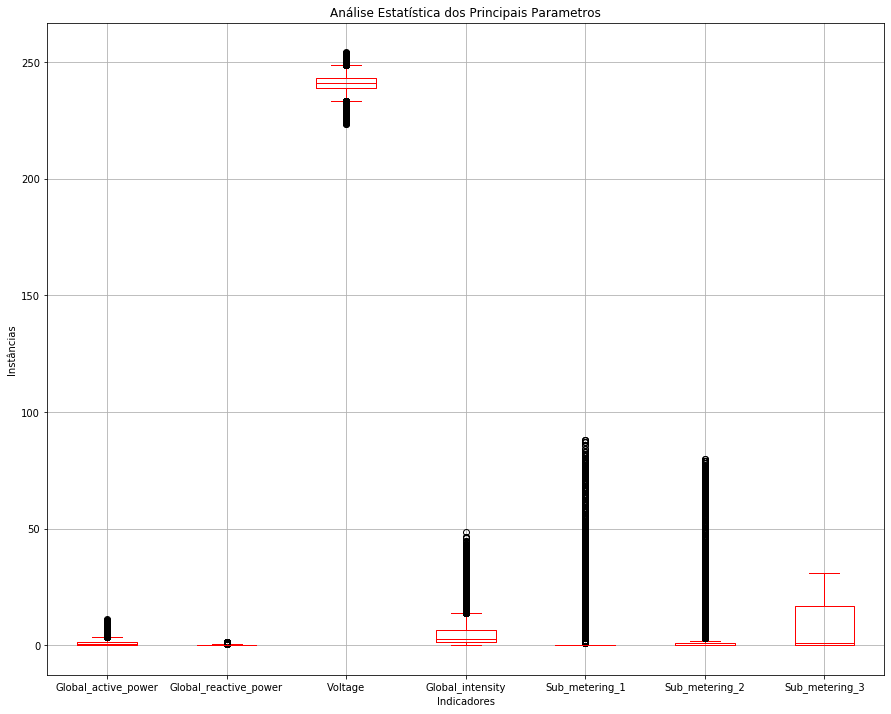

In [ ]:
# Busca por outiliers
plt.figure(figsize = (15,12))
df.boxplot(color = 'red')
plt.title('Análise Estatística dos Principais Parametros')
plt.xlabel('Indicadores')
plt.ylabel('Instâncias')
plt.show()


In [ ]:
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


### <font color = '#0000FF'>PREPROCESSAMENTO E MACHINE LEARNING<font/>
#### <font color = 'FF0000'>Carregamento dos pacotes para Machine Learning<font/>

In [ ]:
# normalizar os dados
from sklearn.preprocessing import StandardScaler

# Cria os agrupamentos
from sklearn.cluster import KMeans

# Separa dados de treinamento
from sklearn.model_selection import train_test_split

# Decompor a massa de dados em componentes
from sklearn.decomposition import PCA

# Avalia o score do kmeans
from sklearn.metrics import silhouette_score

### PARAMETROS DO KMeans:

class sklearn.cluster.KMeans(n_clusters=8, *, init='k-means++', n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='auto')

#### Attributes:

cluster_centers_ndarray of shape (n_clusters, n_features)
Coordinates of cluster centers. If the algorithm stops before fully converging (see tol and max_iter), these will not be consistent with labels_.

labels_ndarray of shape (n_samples,)
Labels of each point

inertia_float
Sum of squared distances of samples to their closest cluster center, weighted by the sample weights if provided.

n_iter_int
Number of iterations run.

n_features_in_int
Number of features seen during fit.

New in version 0.24.

feature_names_in_ndarray of shape (n_features_in_,)
Names of features seen during fit. Defined only when X has feature names that are all strings.

source:
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html?highlight=kmeans#sklearn.cluster.KMeans

### PARAMETROS DO train_test_split:

sklearn.model_selection.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)

source:
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html?highlight=train#sklearn.model_selection.train_test_split

### PARAMETROS DO  PCA:

class sklearn.decomposition.PCA(n_components=None, *, copy=True, whiten=False, svd_solver='auto', tol=0.0, iterated_power='auto', random_state=None)

source:
https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html?highlight=pca#sklearn.decomposition.PCA

### PARAMETROS DO silhouette_score:

sklearn.metrics.silhouette_score(X, labels, *, metric='euclidean', sample_size=None, random_state=None, **kwds)

source:
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html?highlight=silhouette#sklearn.metrics.silhouette_score

In [ ]:
# Capturar amostra dos valores do dataset
amostra = df.sample(frac = 0.05, random_state = 590)
k_values = amostra.values

In [ ]:
# Criar objeto PCA com 2 componentes e treiná-lo
# É possível escolher o valor para n_components, mas como saberia qual o melhor valor?

pca_2 = PCA(n_components = 2)
pca = pca_2.fit_transform(k_values)

In [ ]:
# Taxa de variancia explicada
# A taxa de variancia explicada significa que 49.1% da variancia da massa de dados está al longo do eixo 1(pca1), 
# e que 23.77% está ao longo do eixo 2(pca2)

# Caso tivéssemos mais pcas (n_components > 2), haveria mais taxas de variancia.

pca_2.explained_variance_ratio_

array([0.49094914, 0.23770721])

In [ ]:
# Observe para n_components = 3

pca_3 = PCA(n_components = 3)
pca_v3 = pca_3.fit_transform(k_values)
pca_3.explained_variance_ratio_

array([0.49094914, 0.23770721, 0.19472779])

In [ ]:
# Outra opção seria criar um gráfico que ajudasse com a escolha do numeros de componentes

# Criar um objeto PCA com parametros padrão
pca = PCA()

# Treinar o pca
pca.fit(k_values)

# Criar objeto que acumule a soma das taxas de variancia explicada
pca_cumsum = np.cumsum(pca.explained_variance_ratio_)

# Criar um objeto que preserve 95% da variancia
c = np.argmax(pca_cumsum >= 0.95) + 1

In [ ]:
# Número máximo de componentes para 95% de variancia preservada
c

4

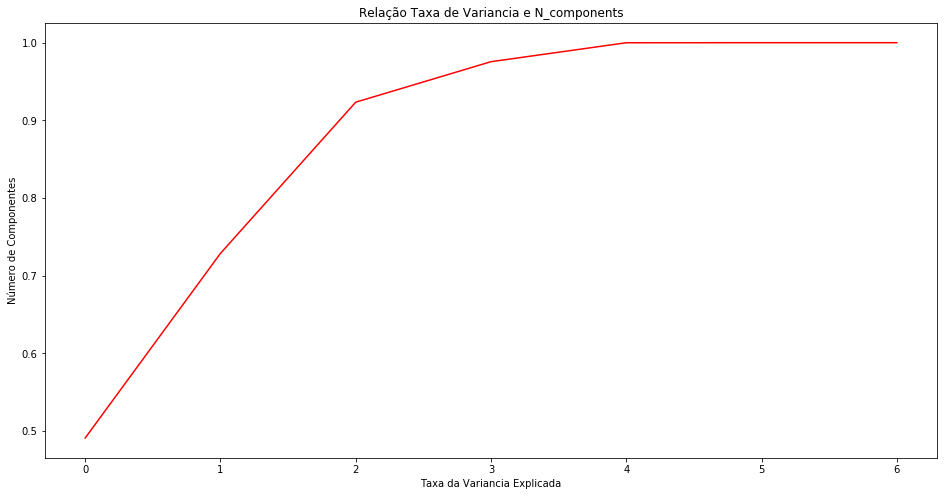

In [ ]:
# Observe que em torno de 95% o número de componentesa está entre 2 e 3, sendo 2 o mais próximo dos 95% de variancias
# Portanto, eu decidirei por usar n_components = 2

plt.figure(figsize = (16,8))

plt.plot(pca_cumsum, color = 'red')
plt.xlabel('Taxa da Variancia Explicada')
plt.ylabel('Número de Componentes')
plt.title('Relação Taxa de Variancia e N_components')
plt.show()
    

In [ ]:
# Aplicando o número de componentes preferido = 2

pca_4 = PCA(n_components = 2, random_state = 590)
pca = pca_4.fit_transform(k_values)

In [ ]:
# Taxa de variancia explicada
print(pca_2.explained_variance_ratio_)
print('')

# Valores dos componentes para 2 componentes
print(pca_4.components_)
print('')

[0.49094914 0.23770721]

[[ 0.09585401  0.00201449 -0.13683982  0.39955923  0.22759769  0.18329746
   0.85266439]
 [ 0.05960721  0.00252272 -0.0880116   0.25949635  0.72986968  0.44797148
  -0.43355278]]



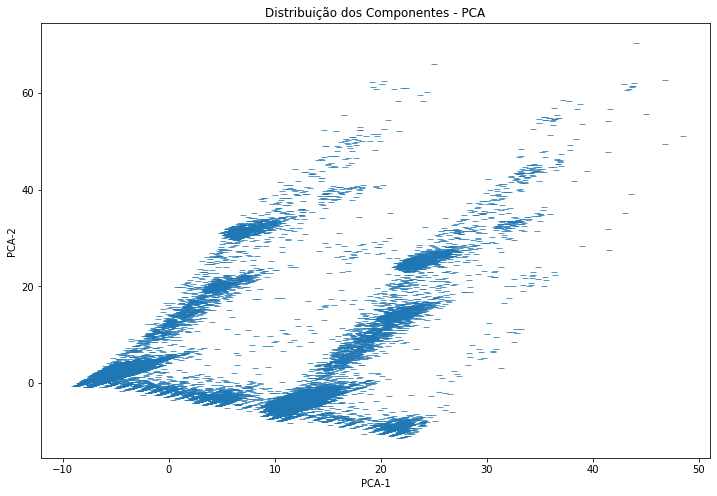

In [ ]:
# Plotagem dos componentes derivados do pca
plt.figure(figsize = (12,8))
sb.scatterplot(pca[:, 0], pca[:, 1], marker =True)
plt.title('Distribuição dos Componentes - PCA')
plt.xlabel('PCA-1')
plt.ylabel('PCA-2')
plt.show()

3 6058585.61077738
4 3127522.3702552775
5 2771460.574425777
6 2541719.953431295
7 2334921.839346111
8 2230269.7296320004
9 2061279.553826587
10 1915091.4571496926
11 1741177.8736288203
12 1861801.91335733
13 1731890.250264119
14 1646889.2548191724
15 1474728.9759015301
16 1588132.9632711643
17 1396658.0627629492

0.4610824346542358 minutos


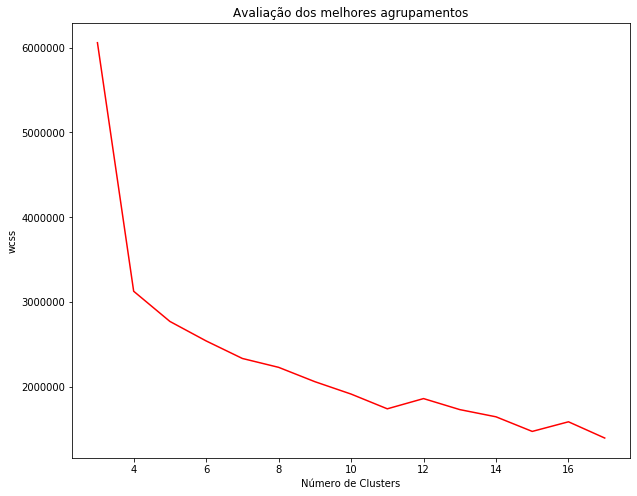

In [ ]:
# Criar gráfico Elbow para verificar os melhores agrupamentos, levando em consideração a soma dos quadrados dentro dos grupos
# wcss: within cluster sum of squared (soma dos quadrado dentro dos clusters)
# inertia_: somatório dos erros quadrados

import time
inicio = time.time() 

wcss =[]
for i in range(3,18):
    km = KMeans(n_clusters=i, init='random')
    km.fit_transform(k_values)
    wcss.append(km.inertia_)
    print(i, km.inertia_)

fim = time.time()
print('')
print((fim - inicio)/60, 'minutos')

plt.figure(figsize=(10,8))
plt.plot(range(3,18), wcss, color = 'red')
plt.title('Avaliação dos melhores agrupamentos')
plt.xlabel('Número de Clusters')
plt.ylabel('wcss')
plt.show()

### <font color = '#0000FF'>Invertigar com análise de 7, 8, 10 agrupamentos<font/>
#### A ideia é ver se o aumento cria novos grupos bem definidos ou um aglomerado de agrupamentos sem sentido aparente

### Versão para 7 grupos

Text(0, 0.5, 'PCA-2')

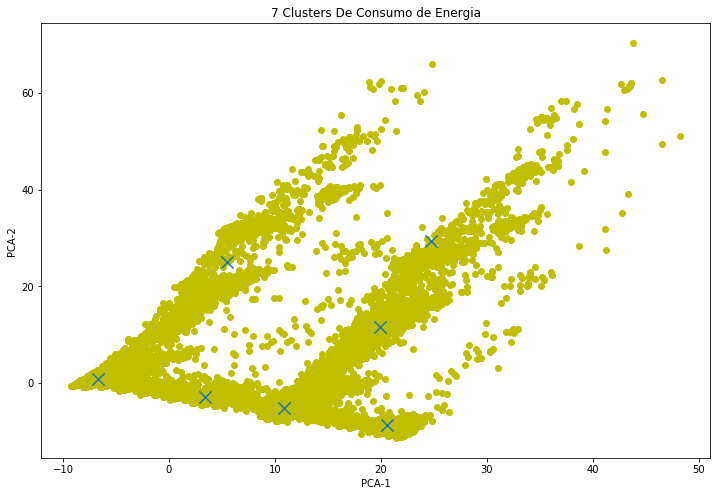

In [ ]:
# treina o modelo com KMeans para 7 agrupamentos
modelo_7 = KMeans(n_clusters=7, random_state=590, init='random')
modelo_7.fit_transform(pca)


# Verificar os centróides: marcadores para as variâncias
centros_7 = modelo_7.cluster_centers_

# Verificar os grupos para kmeans = 7
plt.figure(figsize=(12,8))
plt.scatter(pca[:, 0], pca[:, 1], color = 'y')
plt.scatter(centros_7[:, 0], centros_7[:, 1], marker = 'x', s = 150, linewidths=5)
plt.title('7 Clusters De Consumo de Energia')
plt.xlabel('PCA-1')
plt.ylabel('PCA-2')

In [ ]:
# Avaliação do modelo_v1
inicio = time.time()

labels = modelo_7.labels_
ss7 = silhouette_score(X = pca, labels = labels)

fim = time.time()
print(ss7)
print('')
print(fim - inicio, 'segundos')

0.7966189726929142

138.11546301841736 segundos


### Versão para 8 grupos

Text(0, 0.5, 'PCA-2')

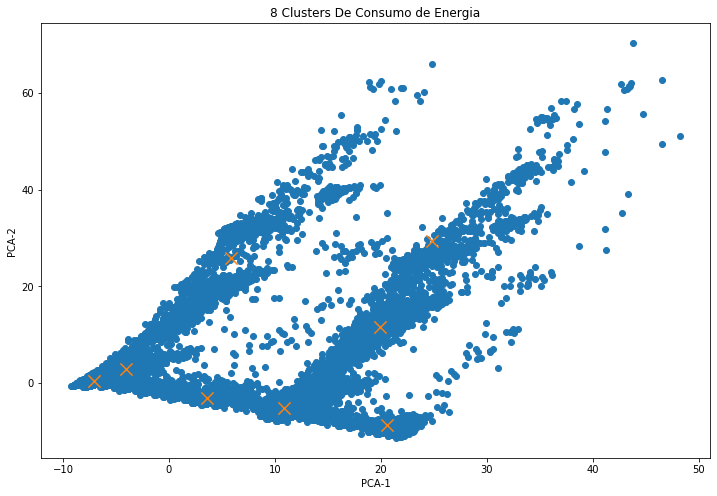

In [ ]:
# treina o modelo com KMeans para 8 agrupamentos
modelo_8 = KMeans(n_clusters=8, random_state=590, init='random', )
modelo_8.fit_transform(pca)


# Verificar os centróides: marcadores para as variâncias
centros_8 = modelo_8.cluster_centers_

# Verificar os grupos para kmeans = 8
plt.figure(figsize=(12,8))
plt.scatter(pca[:, 0], pca[:, 1])
plt.scatter(centros_8[:, 0], centros_8[:, 1], marker = 'x', s = 150, linewidths=5)
plt.title('8 Clusters De Consumo de Energia')
plt.xlabel('PCA-1')
plt.ylabel('PCA-2')

In [ ]:
# Avaliação do modelo_v1
inicio = time.time()

labels = modelo_8.labels_
ss8 = silhouette_score(X = pca, labels = labels)

fim = time.time()
print(ss8)
print('')
print(fim - inicio, 'segundos')

0.6831657194907933

137.41171383857727 segundos


### Versão para 10 grupos

Text(0, 0.5, 'PCA-2')

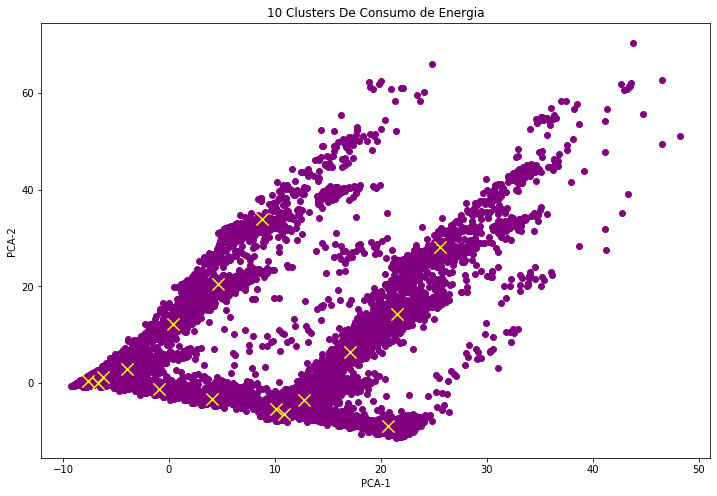

In [ ]:
# treina o modelo com KMeans para 10 agrupamentos
modelo_10 = KMeans(n_clusters=16, random_state=590, init='random')
modelo_10.fit_transform(pca)


# Verificar os centróides: marcadores para as variâncias
centros_10 = modelo_10.cluster_centers_

# Verificar os grupos para kmeans = 10
plt.figure(figsize=(12,8))
plt.scatter(pca[:, 0], pca[:, 1], color = 'purple')
plt.scatter(centros_10[:, 0], centros_10[:, 1], marker = 'x', color = 'yellow', s = 150, linewidths=5)
plt.title('10 Clusters De Consumo de Energia')
plt.xlabel('PCA-1')
plt.ylabel('PCA-2')

In [ ]:
# Avaliação do modelo_v4
inicio = time.time()

labels = modelo_10.labels_
ss10 = silhouette_score(X = pca, labels = labels)

fim = time.time()
print(ss10)
print('')
print(fim - inicio, 'segundos')

0.4217707409244463

130.53163146972656 segundos


### Comparação dos modelos

In [ ]:
ss = ({'modelos':('modelo_7', 'modelo_8', 'modelo_10'),
       'silhouette':(ss7, ss8, ss10),
      'clusters':('sete', 'oito','dez')})
compara = pd.DataFrame(data = ss, columns = ['modelos', 'clusters','silhouette'])
compara

,modelos,clusters,silhouette
0,modelo_7,sete,0.796619
1,modelo_8,oito,0.683166
2,modelo_10,dez,0.421771


## <font color = '0000FF'>CONSIDERAÇÕES FINAIS<font/>
## O uso do PCA ao dividir o dataset em dois componentes auxiliou na implementação do KMeans.
## O uso do gráfico de elbow foi fundamental para a primeira análise de clusters, o que apresentou as melhores opções de agrupamento para o uso do KMeans.
## O modelo KMeans com 7 agrupamentos apresentou melhor opção, tanto na análise visual quanto na métrica silhouette com 79,66%.
## Os modelos com 8 e 10 agrupamentos apresentaram centróides muito próximos, causando indeterminação, até mesmo sobreposição de centroídes, entre os grupos.
## Sendo assim, é possível analisar o modelo com sete agrupamentos com mais profundidade, sobre quanto ao comportamento de consumo de energia, sobre ofertas personalizadas e outras abordagens de marketing.

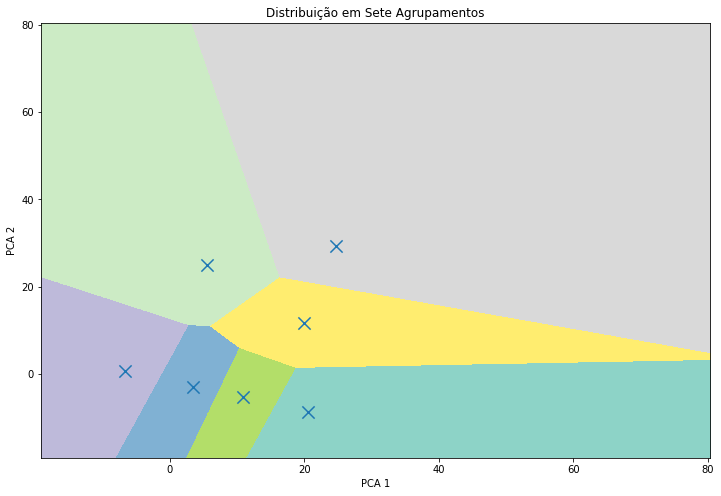

In [ ]:
# Para melhorar visualização dos agrupamentos pode-se usar o meshgrig
# MESHGRID
h = 0.02
x_min, x_max = pca[:, 0].min() - 10, pca[:, 1].max() + 10
y_min, y_max = pca[:, 0].min() -10, pca[:, 1].max() + 10

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = modelo_7.predict(np.c_[xx.ravel(), yy.ravel()])

plt.figure(1, figsize = (12,8))
plt.clf()
Z = Z.reshape(xx.shape)

# IMAGEM
plt.imshow(Z, 
           interpolation = 'nearest', 
           extent = (xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Set3, 
           aspect = 'auto', 
           origin = 'lower')
plt.scatter(x = centros_7[:, 0], y = centros_7[:, 1], marker = 'x', s = 150, linewidths= 3)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Distribuição em Sete Agrupamentos')
plt.show()

# FIM